## IMPORT LIBRARIES

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Abhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## *READ DATASETS*

In [2]:
data=pd.read_csv('amazon.csv')

In [3]:
data.head()

,Text,label
0,This is the best apps acording to a bunch of ...,1
1,This is a pretty good version of the game for ...,1
2,this is a really . there are a bunch of levels...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1


In [4]:
data.shape

(19996, 2)



<p style="font-size: 17px;">We have there are 19996 rows and 2 columns present in our datasets.</p>


In [5]:
data.describe()

,label
count,19996.000000
mean,0.761652
std,0.426083
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [6]:
# Check nulll values
data.isnull().sum()

Text     0
label    0
dtype: int64

<p style="font-size: 17px;">No null values in our dataset</p>

In [7]:
# Check duplicate values 
data.duplicated().sum()

0

<p style="font-size: 20px;">No duplicated values in our dataset.</p>

## Exploratory data Analysis

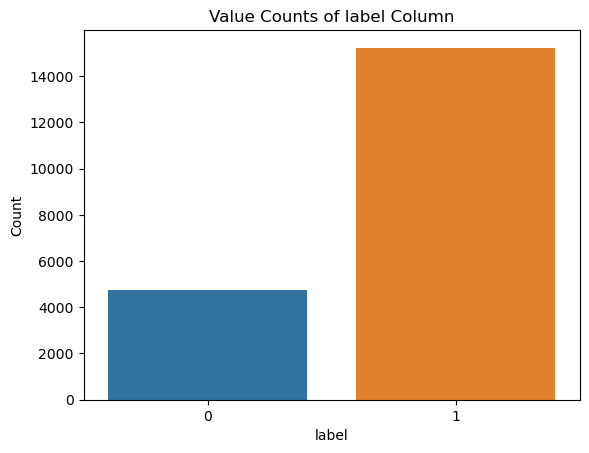

In [8]:
sns.countplot(data, x='label')

plt.ylabel('Count')
plt.title('Value Counts of label Column')

# Show the plot
plt.show()

We can see that our data is imbalanced

In [9]:
# Number of characters
data['num_characters'] = data['Text'].apply(len)

In [10]:
#Number Of words
data['num_words'] = data['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [11]:
# Number of senteances
data['num_sentances'] = data['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [12]:
# Number of characters
data[['num_characters','num_words','num_sentances']].describe()

,num_characters,num_words,num_sentances
count,19996.000000,19996.000000,19996.00000
mean,175.787257,39.009852,2.94774
std,58.964840,12.895655,1.41114
min,3.000000,1.000000,1.00000
25%,123.000000,27.000000,2.00000
50%,164.000000,37.000000,3.00000
75%,254.000000,51.000000,4.00000
max,254.000000,123.000000,37.00000


In [13]:
data[data['label']==1][['num_characters','num_words','num_sentances']].describe()

,num_characters,num_words,num_sentances
count,15230.000000,15230.000000,15230.000000
mean,176.880105,39.107091,2.969074
std,59.203402,12.930085,1.404112
min,3.000000,1.000000,1.000000
25%,123.000000,27.000000,2.000000
50%,165.000000,37.000000,3.000000
75%,254.000000,52.000000,4.000000
max,254.000000,110.000000,37.000000


In [14]:
data[data['label']==0][['num_characters','num_words','num_sentances']].describe()

,num_characters,num_words,num_sentances
count,4766.000000,4766.000000,4766.000000
mean,172.295006,38.699119,2.879564
std,58.064355,12.781402,1.431388
min,4.000000,1.000000,1.000000
25%,121.000000,28.000000,2.000000
50%,159.000000,36.000000,3.000000
75%,239.000000,50.000000,4.000000
max,254.000000,123.000000,20.000000


In [ ]:
sns.pairplot(data, hue='label')

In [ ]:
numeric_df = data.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()


In [ ]:
sns.heatmap(correlation_matrix, annot=True)

<p style="font-size: 17px;">We can see that num of words and number of character is highly correlation.</p>

**Data Preprocessing**
* Lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuation
* Steming

In [ ]:
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    result = []
    for word in text:
        # Check if the word is alphanumeric and not in stopwords and not in string.punctuation
        if word.isalnum() and word not in stopwords.words('english') and word not in string.punctuation:
            result.append(word)
    
    stemmer = PorterStemmer()
    result = [stemmer.stem(word) for word in result]
    return " ".join(result)

In [ ]:
data['transformed_text'] = data['Text'].apply(transform_text)

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=1000, height=600, min_font_size=10, background_color='black')

spam_wc = wc.generate(data[data['label'] == 1]['transformed_text'].str.cat(sep = " "))

plt.figure(figsize=(10, 10))
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(data[data['label'] == 0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize=(10, 10))
plt.imshow(spam_wc)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf =TfidfVectorizer()

In [ ]:
X = tfidf.fit_transform(data['transformed_text']).toarray()

In [ ]:
X.shape

In [ ]:
y= data['label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred45 = rf.predict(X_test)  
print("Accuracy:", accuracy_score(y_test, y_pred45))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred45))
print("Precision Score:", precision_score(y_test, y_pred45))

In [ ]:
cm = confusion_matrix(y_test, y_pred45)

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')


plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),  # Dropout layer with 20% dropout rate
    Dense(32, activation='relu'),
    Dropout(0.5),  # Dropout layer with 20% dropout rate
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=5, batch_size=64, 
                    validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy:', accuracy)


In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()